In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [86]:
pip install -U nltk

In [87]:
data = pd.read_table("SMSSpamCollection.tsv")
data[0:500]

,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...
...,...,...
495,ham,Dear i have reache room
496,ham,"Fighting with the world is easy, u either win ..."
497,ham,When can ü come out?
498,ham,Check with nuerologist.


In [88]:
data = pd.read_csv("SMSSpamCollection.tsv", sep="\t", names=["mail","text"], header = None)
data.head()


,mail,text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


#**Pre-processing**

#Remove Punctuations

In [89]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [90]:
def removepunc(text):
  punc_remove="".join([i for i in text if i not in string.punctuation])
  return punc_remove

data["text"] = data["text"].apply(lambda x: removepunc(x))

data.head()

,mail,text
0,ham,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL


#Tokenization

In [91]:
import re
def tokenization(text):
  token = re.split("\W+",text)
  return token

data["text"] = data["text"].apply(lambda x:tokenization(x))
data.head()

,mail,text
0,ham,"[Ive, been, searching, for, the, right, words,..."
1,spam,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
2,ham,"[Nah, I, dont, think, he, goes, to, usf, he, l..."
3,ham,"[Even, my, brother, is, not, like, to, speak, ..."
4,ham,"[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]"


#Stopwords

In [92]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")

def remove_stopwords(token):
  text = [word for word in token if word not in stopwords]
  return text

data["text"] = data["text"].apply(lambda x:remove_stopwords(x))
data.head()  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,mail,text
0,ham,"[Ive, searching, right, words, thank, breather..."
1,spam,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
2,ham,"[Nah, I, dont, think, goes, usf, lives, around..."
3,ham,"[Even, brother, like, speak, They, treat, like..."
4,ham,"[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]"


#Stemming

In [93]:
w = nltk.PorterStemmer()

def stemming(text):
  t = [w.stem(word) for word in text]
  return t

data["text"] = data["text"].apply(lambda x:stemming(x)) 
data.head()


,mail,text
0,ham,"[ive, search, right, word, thank, breather, i,..."
1,spam,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"[nah, i, dont, think, goe, usf, live, around, ..."
3,ham,"[even, brother, like, speak, they, treat, like..."
4,ham,"[i, have, a, date, on, sunday, with, will]"


#Lemmatizer

In [94]:
nltk.download('wordnet')
nltk.download('omw-1.4')
w=nltk.WordNetLemmatizer()

def lemmatizer(text):
  t=[w.lemmatize(word)for word in text]
  return t

data["text"] = data["text"].apply(lambda x: lemmatizer(x) ) 
data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,mail,text
0,ham,"[ive, search, right, word, thank, breather, i,..."
1,spam,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"[nah, i, dont, think, goe, usf, live, around, ..."
3,ham,"[even, brother, like, speak, they, treat, like..."
4,ham,"[i, have, a, date, on, sunday, with, will]"


In [95]:
data.to_csv("SMSSpamCollection_cleaned.csv", sep=',')

In [96]:
data.head()

,mail,text
0,ham,"[ive, search, right, word, thank, breather, i,..."
1,spam,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"[nah, i, dont, think, goe, usf, live, around, ..."
3,ham,"[even, brother, like, speak, they, treat, like..."
4,ham,"[i, have, a, date, on, sunday, with, will]"


#Apply Count Vectorizer
Encoding Text as integer i.e. numeric form to create feature vectors so that we can apply ML algos on it.

In [97]:
ps = nltk.PorterStemmer()

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(analyzer = clean_text)
x_count = count.fit_transform(data["text"])
x_count.shape
count.get_feature_names()



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['',
 '07732584351rodgerburnmsgwetricallreplismfreenokiamobilfreecamcordpleacall08000930705deliveritomorrow',
 '0871471238810am7pmcost10p',
 '09066362231urgentyourmobilno07xxxxxxxxx2000bonucallerprize0206032ndattemptreachyoucall09066362231asap',
 '0anetworkallowcompanibillsmresponssuppliershopgiveguarantesellbg',
 '1000flirtnowtxtgirlblokeurnameageeggirlzoe188007joingetchat',
 '1000girlmanilocal2urvirgin2rreadi24filureverisexualneedcanu4filtextcute69911150p',
 '100dateserviccall09064012103box334sk38ch',
 '10minlaterk',
 '120callcostwhichguessisntbadmissyaneedyawantyaloveya',
 '123congratulweekcompetitdrawu1450prizeclaimcall09050002311b4280703tcsstopsm08718727868over18150ppm',
 '18dayeuro2004kickoffukeptinformlatestnewsresultdailiunsubscribsendgeteurostop83222',
 '1appledaynodoctor1tulsileafdaynocancer1lemondaynofat1cupmilkdaynoboneproblm3litrwatrdaynodiseassndth2whomucar',
 '1cbe2chennai',
 '1finishmeetcal',
 '1gowritemsg2putdictionarimode3coverscreenhand4pressltgt5gentliremovurhanditi

In [98]:
x_count_df = pd.DataFrame(x_count.toarray(), columns=count.get_feature_names())
x_count_df.head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,07732584351rodgerburnmsgwetricallreplismfreenokiamobilfreecamcordpleacall08000930705deliveritomorrow,0871471238810am7pmcost10p,09066362231urgentyourmobilno07xxxxxxxxx2000bonucallerprize0206032ndattemptreachyoucall09066362231asap,0anetworkallowcompanibillsmresponssuppliershopgiveguarantesellbg,1000flirtnowtxtgirlblokeurnameageeggirlzoe188007joingetchat,1000girlmanilocal2urvirgin2rreadi24filureverisexualneedcanu4filtextcute69911150p,100dateserviccall09064012103box334sk38ch,10minlaterk,120callcostwhichguessisntbadmissyaneedyawantyaloveya,123congratulweekcompetitdrawu1450prizeclaimcall09050002311b4280703tcsstopsm08718727868over18150ppm,18dayeuro2004kickoffukeptinformlatestnewsresultdailiunsubscribsendgeteurostop83222,1appledaynodoctor1tulsileafdaynocancer1lemondaynofat1cupmilkdaynoboneproblm3litrwatrdaynodiseassndth2whomucar,1cbe2chennai,1finishmeetcal,1gowritemsg2putdictionarimode3coverscreenhand4pressltgt5gentliremovurhanditinterest,1idontnumber2gonnamassivpainasidrathergetinvolvthatpossibl,1reachhomecal,1stwkfreegr8tonestr82uwktxtnokiaon8007classicnokiatonehiton8007polinokia150ppoly200p16,1tensionface2smileface3wastface4innocface5terrorface6cruelface7romantface8lovablface9decentfaceltgtjokerfac,22146tf150p,22daykickforeuro2004ukeptdatelatestnewsresultdailitoremovsendgettxtstop83222,25p4alfimoonchildneedsongurmobtellurm8txttonechariti8007nokiapolicharitipolized08701417012profit2char,26thofjuli,2celebrbdayel,2halfyearmissfriendship,2laptopinoeinfraslowlariwanfaston,2marrowwedltgt2aha,2mrocomegymmachangoodnight,2ppermincallgermani08448350055btlinejust2ppermincheckplanettalkinstantcominfotctextstopopt,3freetarottextfindlovelifetri3forfreetextchanc8555516after3freemsg150,3paselect,3youreceivmobilcontentenjoy,447732584351dowantnewnokia3510icolourphonedeliveredtomorrowwith300freeminutmobil100freetextfreecamcordreplicall08000930705,449050000301you2000pricetoclaimcall09050000301,449071512431urgentthi2ndattemptcontactuuwon1250call09071512433b4050703tcsbcm4235wc1n3xxcallcost150ppmmobilesvarimax750,4mthhalfpriceoranglinerentallatestcameraphone4freehadphone11mthcallmobilesdirectfree08000938767updator2stoptxt,4mthhalfpriceoranglinerentallatestcameraphone4freehadphone11mthcallmobilesdirectfree08000938767updator2stoptxttc,4oclockminejustbashflatplan,4taco1rajaburritoright,...,yupparagonihaventdecidwhether2cutyethe,yupshdhafard10pageaddfigurügotmanipag,yupsongbronocreativnevatestqualitihesaidcheckreviewonlin,yupstudisurflorimelazimodetoday,yupthkcinebetterconeed2go2plazamah,yupthkeshopcloselor,yupthkreteachersaidmakefacelooklongerdarrenask2cutshort,yupthkuosoborewat,yupwunbelievwatureallinevacemsgsentshuhui,yupziveoredibookslot4weekendliao,yupücomin,ywhereuatdogbreathitjustsoundlikejancthats,yüwangocdoctor,zoeitjusthitme2imfuckshitinmyselfildefotrimyhardest2cum2morowluvumillionlekdog,übotnoteoredicojuzremgot,ücalldadoredi,ücollecturlaptopgoconfigurdasetizzit,ücomelt25npaslar,ücominfetchuoredi,üdunneedpickurgf,üdunwanwatchinfernaffair,üeatinlaterimeatinwiffrenleiügohomefirst,ügivetimewalk,ügohomeliaoaskdadpick6,ügotwatbuytelluüneedcom,ühomeworkmeh,ülog4watitsdryb8i,ümeanconfirmitotjuzsayoniok,ünevatellnoeimhomedaaftwat,üpredictwattimeüllfinishbuy,üreadical,üsaylikedatdunbuyericssonosocannotoredilar,üsendcontentpag,üstillattenddatalk,üstillgotlessonüsch,ütakinlinearalgebratoday,üthkwateattonight,üvfan,üwait4schfinishard5,üwritewat
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

#Vectorize Raw Data:
1. N Grams
Apply CountVectorizer(N-Grams)

In [99]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vect = CountVectorizer(ngram_range=(2,2),analyzer=clean_text) # It applies only bigram vectorizer
X_counts = ngram_vect.fit_transform(data['text'])
print(X_counts.shape)
print(ngram_vect.get_feature_names())

(5568, 5117)
['', '07732584351rodgerburnmsgwetricallreplismfreenokiamobilfreecamcordpleacall08000930705deliveritomorrow', '0871471238810am7pmcost10p', '09066362231urgentyourmobilno07xxxxxxxxx2000bonucallerprize0206032ndattemptreachyoucall09066362231asap', '0anetworkallowcompanibillsmresponssuppliershopgiveguarantesellbg', '1000flirtnowtxtgirlblokeurnameageeggirlzoe188007joingetchat', '1000girlmanilocal2urvirgin2rreadi24filureverisexualneedcanu4filtextcute69911150p', '100dateserviccall09064012103box334sk38ch', '10minlaterk', '120callcostwhichguessisntbadmissyaneedyawantyaloveya', '123congratulweekcompetitdrawu1450prizeclaimcall09050002311b4280703tcsstopsm08718727868over18150ppm', '18dayeuro2004kickoffukeptinformlatestnewsresultdailiunsubscribsendgeteurostop83222', '1appledaynodoctor1tulsileafdaynocancer1lemondaynofat1cupmilkdaynoboneproblm3litrwatrdaynodiseassndth2whomucar', '1cbe2chennai', '1finishmeetcal', '1gowritemsg2putdictionarimode3coverscreenhand4pressltgt5gentliremovurhanditint

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [100]:
X_counts_df = pd.DataFrame(X_counts.toarray(), columns=ngram_vect.get_feature_names())
X_counts_df.head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,07732584351rodgerburnmsgwetricallreplismfreenokiamobilfreecamcordpleacall08000930705deliveritomorrow,0871471238810am7pmcost10p,09066362231urgentyourmobilno07xxxxxxxxx2000bonucallerprize0206032ndattemptreachyoucall09066362231asap,0anetworkallowcompanibillsmresponssuppliershopgiveguarantesellbg,1000flirtnowtxtgirlblokeurnameageeggirlzoe188007joingetchat,1000girlmanilocal2urvirgin2rreadi24filureverisexualneedcanu4filtextcute69911150p,100dateserviccall09064012103box334sk38ch,10minlaterk,120callcostwhichguessisntbadmissyaneedyawantyaloveya,123congratulweekcompetitdrawu1450prizeclaimcall09050002311b4280703tcsstopsm08718727868over18150ppm,18dayeuro2004kickoffukeptinformlatestnewsresultdailiunsubscribsendgeteurostop83222,1appledaynodoctor1tulsileafdaynocancer1lemondaynofat1cupmilkdaynoboneproblm3litrwatrdaynodiseassndth2whomucar,1cbe2chennai,1finishmeetcal,1gowritemsg2putdictionarimode3coverscreenhand4pressltgt5gentliremovurhanditinterest,1idontnumber2gonnamassivpainasidrathergetinvolvthatpossibl,1reachhomecal,1stwkfreegr8tonestr82uwktxtnokiaon8007classicnokiatonehiton8007polinokia150ppoly200p16,1tensionface2smileface3wastface4innocface5terrorface6cruelface7romantface8lovablface9decentfaceltgtjokerfac,22146tf150p,22daykickforeuro2004ukeptdatelatestnewsresultdailitoremovsendgettxtstop83222,25p4alfimoonchildneedsongurmobtellurm8txttonechariti8007nokiapolicharitipolized08701417012profit2char,26thofjuli,2celebrbdayel,2halfyearmissfriendship,2laptopinoeinfraslowlariwanfaston,2marrowwedltgt2aha,2mrocomegymmachangoodnight,2ppermincallgermani08448350055btlinejust2ppermincheckplanettalkinstantcominfotctextstopopt,3freetarottextfindlovelifetri3forfreetextchanc8555516after3freemsg150,3paselect,3youreceivmobilcontentenjoy,447732584351dowantnewnokia3510icolourphonedeliveredtomorrowwith300freeminutmobil100freetextfreecamcordreplicall08000930705,449050000301you2000pricetoclaimcall09050000301,449071512431urgentthi2ndattemptcontactuuwon1250call09071512433b4050703tcsbcm4235wc1n3xxcallcost150ppmmobilesvarimax750,4mthhalfpriceoranglinerentallatestcameraphone4freehadphone11mthcallmobilesdirectfree08000938767updator2stoptxt,4mthhalfpriceoranglinerentallatestcameraphone4freehadphone11mthcallmobilesdirectfree08000938767updator2stoptxttc,4oclockminejustbashflatplan,4taco1rajaburritoright,...,yupparagonihaventdecidwhether2cutyethe,yupshdhafard10pageaddfigurügotmanipag,yupsongbronocreativnevatestqualitihesaidcheckreviewonlin,yupstudisurflorimelazimodetoday,yupthkcinebetterconeed2go2plazamah,yupthkeshopcloselor,yupthkreteachersaidmakefacelooklongerdarrenask2cutshort,yupthkuosoborewat,yupwunbelievwatureallinevacemsgsentshuhui,yupziveoredibookslot4weekendliao,yupücomin,ywhereuatdogbreathitjustsoundlikejancthats,yüwangocdoctor,zoeitjusthitme2imfuckshitinmyselfildefotrimyhardest2cum2morowluvumillionlekdog,übotnoteoredicojuzremgot,ücalldadoredi,ücollecturlaptopgoconfigurdasetizzit,ücomelt25npaslar,ücominfetchuoredi,üdunneedpickurgf,üdunwanwatchinfernaffair,üeatinlaterimeatinwiffrenleiügohomefirst,ügivetimewalk,ügohomeliaoaskdadpick6,ügotwatbuytelluüneedcom,ühomeworkmeh,ülog4watitsdryb8i,ümeanconfirmitotjuzsayoniok,ünevatellnoeimhomedaaftwat,üpredictwattimeüllfinishbuy,üreadical,üsaylikedatdunbuyericssonosocannotoredilar,üsendcontentpag,üstillattenddatalk,üstillgotlessonüsch,ütakinlinearalgebratoday,üthkwateattonight,üvfan,üwait4schfinishard5,üwritewat
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

#2. TF-IDF
Apply TFIDFvectorizer

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(5568, 5117)
['', '07732584351rodgerburnmsgwetricallreplismfreenokiamobilfreecamcordpleacall08000930705deliveritomorrow', '0871471238810am7pmcost10p', '09066362231urgentyourmobilno07xxxxxxxxx2000bonucallerprize0206032ndattemptreachyoucall09066362231asap', '0anetworkallowcompanibillsmresponssuppliershopgiveguarantesellbg', '1000flirtnowtxtgirlblokeurnameageeggirlzoe188007joingetchat', '1000girlmanilocal2urvirgin2rreadi24filureverisexualneedcanu4filtextcute69911150p', '100dateserviccall09064012103box334sk38ch', '10minlaterk', '120callcostwhichguessisntbadmissyaneedyawantyaloveya', '123congratulweekcompetitdrawu1450prizeclaimcall09050002311b4280703tcsstopsm08718727868over18150ppm', '18dayeuro2004kickoffukeptinformlatestnewsresultdailiunsubscribsendgeteurostop83222', '1appledaynodoctor1tulsileafdaynocancer1lemondaynofat1cupmilkdaynoboneproblm3litrwatrdaynodiseassndth2whomucar', '1cbe2chennai', '1finishmeetcal', '1gowritemsg2putdictionarimode3coverscreenhand4pressltgt5gentliremovurhanditint

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [102]:
data.head()

,mail,text
0,ham,"[ive, search, right, word, thank, breather, i,..."
1,spam,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"[nah, i, dont, think, goe, usf, live, around, ..."
3,ham,"[even, brother, like, speak, they, treat, like..."
4,ham,"[i, have, a, date, on, sunday, with, will]"


#Feature Engineering

In [103]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'text']
data.head()

,label,text
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


In [104]:
import string

# Function to calculate length of message excluding space
data['body_len'] = data['text'].apply(lambda x: len(x) - x.count(" "))

data.head()

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['punct%'] = data['text'].apply(lambda x: count_punct(x))

data.head()

,label,text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


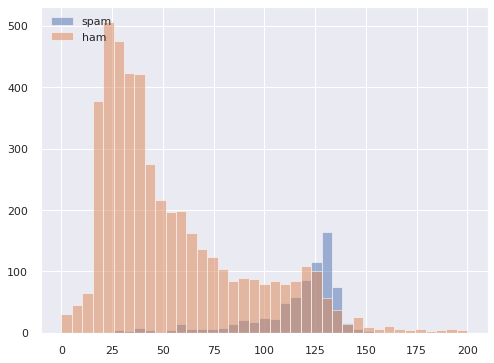

In [105]:
import seaborn as sns
#Setting the size and grid for plotting
sns.set(rc= {"figure.figsize": (8, 6)})

bins = np.linspace(0, 200, 40)

plt.hist(data[data['label']=='spam']['body_len'], bins, alpha=0.5,  label='spam')
plt.hist(data[data['label']=='ham']['body_len'], bins, alpha=0.5, label='ham')
plt.legend(loc='upper left')
plt.show()

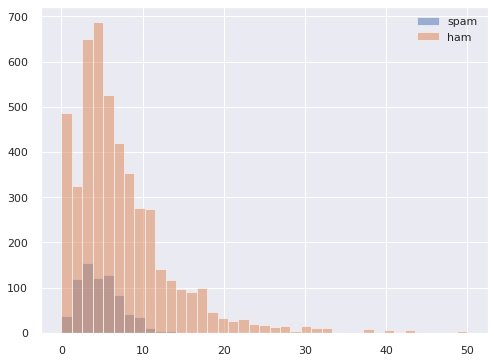

In [106]:
bins = np.linspace(0, 50, 40)

plt.hist(data[data['label']=='spam']['punct%'], bins, alpha=0.5,  label='spam')
plt.hist(data[data['label']=='ham']['punct%'], bins, alpha=0.5,  label='ham')
plt.legend(loc='upper right')
plt.show()

In [107]:
from sklearn.model_selection import train_test_split

X=data[['text', 'body_len', 'punct%']]
y=data['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [108]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['text'])

tfidf_train = tfidf_vect_fit.transform(X_train['text'])
tfidf_test = tfidf_vect_fit.transform(X_test['text'])

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,7173,7174,7175,7176,7177,7178,7179,7180,7181,7182,7183,7184,7185,7186,7187,7188,7189,7190,7191,7192,7193,7194,7195,7196,7197,7198,7199,7200,7201,7202,7203,7204,7205,7206,7207,7208,7209,7210,7211,7212
0,130,6.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,83,7.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41,7.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39,2.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ClassificationReport

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Precision: 1.0 / Recall: 0.884 / F1-Score: 0.939 / Accuracy: 98.474%


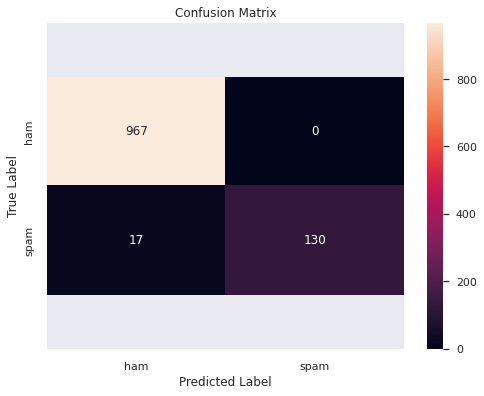

In [114]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

rf_model = rf.fit(X_train_vect, y_train)

y_pred = rf_model.predict(X_test_vect)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}%'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred)*100, 3)))

sns.set(rc= {"figure.figsize": (8, 6)})

cm = confusion_matrix(y_test, y_pred)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
ax = sns.heatmap(df_cm, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


(5.5, -0.5)

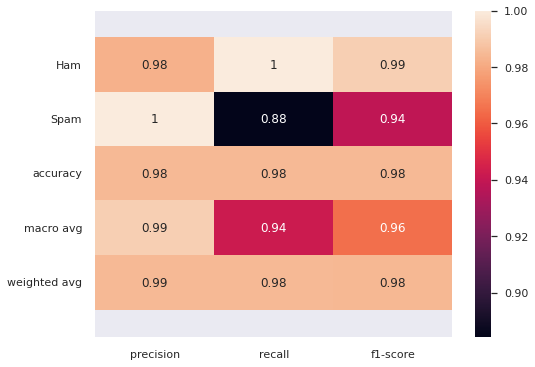

In [115]:
true = np.random.randint(0, 10, size=100)
pred = np.random.randint(0, 10, size=100)
target_names = ["Ham", "Spam"]

clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=target_names,
                                   output_dict=True)

ax = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Precision: 0.992 / Recall: 0.85 / F1-Score: 0.916 / Accuracy: 97.935%


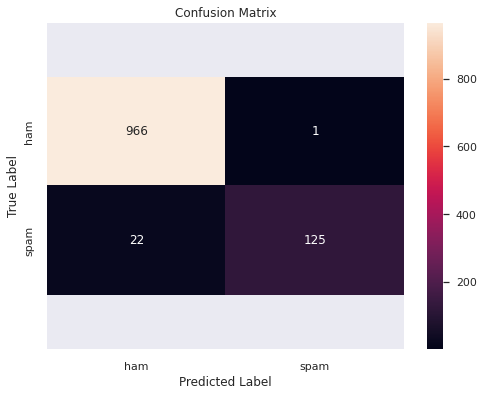

In [116]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
f =clf.fit(X_train_vect, y_train)
y_pred = f.predict(X_test_vect)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}%'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred)*100, 3)))

sns.set(rc= {"figure.figsize": (8, 6)})

cm = confusion_matrix(y_test, y_pred)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
ax = sns.heatmap(df_cm, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


(5.5, -0.5)

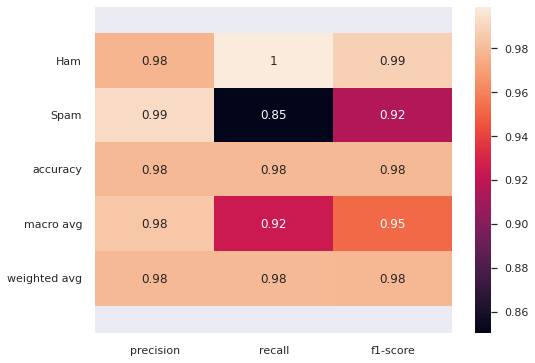

In [117]:
true = np.random.randint(0, 10, size=100)
pred = np.random.randint(0, 10, size=100)
target_names = ["Ham", "Spam"]

clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=target_names,
                                   output_dict=True)

ax = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)